### Finding popular tags in Data Science: Analyzing people's interests in Data Science

##### Introduction

In this project, we're going to find the popular tags that people use to ask questions related to Data Science. Tags here means different programming languages, frameworks, and packages are tool stacks used in Data Science. Through our analysis we're trying to see the interest of the majority of the people in the community. This helps us to get an idea of where the Data Science landscape is moving towards.


To analyze, we're going to take a look at data from Stack Exchange public database. Stack Exchange is a popular site for questions and answers related to the field, in our case Data Science. You can check the link [here](https://datascience.stackexchange.com/) to explore more yourself. So, for now, we're following steps below for our purpose:
- find the appropriate features for data collection from the tables 
- apply the SQL query to extract the data and download it
- find the criteria or proxy to determine the popularity of technologies
- find the top 20 tags(technologies)

###### Summary of Results

After analyzing the data, we got an idea of people using python more often than R in the data science community.  From the StackExchange data, we can be clear that more people are using python to solve their  Data Science related problems.  The use of python libraries as tags to ask questions in the Data Science platform supports the this fact. But compared to 2019,the year 2020 has lower numbers for all the top 20 tags used. We can conclude, based on data, python is dominating the field of Deep Learning and AI(Artificial Intelligence). As quarter of the tags used in the top 20 tags are of deep learning.

For details, please follow full analysis.


**Note**: If you're looking in Github, graphs drawing using plotly don't appear as github doesn't support it(at time of writing). Either you have to run locally or in google-colab to see the graphs plotted using plotly. So, for the reader's convenience, I've used seaborn and matplotlib to plot the same graphs again. The reason to use plotly as it gives more flexibility while interacting with the graphs using effects like zooming and many more without extra coding.

###### Exploring the public StackExchange database


You can check the [link for the Stack Exchange public database](https://data.stackexchange.com/datascience/query/new) where you can try your own query to get answer related to data.

After running some query, found tables `Posts` has some valuable features to answer the question for `most popular topics`. For example,`Posts` table has two columns `Tags` & `ViewCount` serves better for our purpose of analysis.

The Posts table has following columns(that we're considering):

- `Id:` An identification number for the post.
- `PostTypeId:` An identification number for the type of post.

- `CreationDate:` The date and time of creation of the post.

- `Score:` The post's score.
- `ViewCount:` How many times the post was viewed.
- `Tags:` What tags were used.
- `AnswerCount:` How many answers the question got (only applicable to question posts).
- `FavoriteCount:` How many times the question was favored (only applicable to question posts).

Using Following  SQL command to extract the required data of 2019 & 2020 from the database.

`SELECT Id,PostTypeId, CreationDate,Score,ViewCount,
      Tags,AnswerCount, FavoriteCount
FROM posts
  WHERE CreationDate >= '01/01/2019 00:00:00';`
  
After running the above query in the Stack Exchange public database, click the download link for the csv file.

Now, let's load the csv file into dataFrame and start the analysis.

In [2]:
# load standard libraries for data manipulation
import pandas as pd
import numpy as np

# libraries for visaulization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # setting parameters for seaborn

%matplotlib inline

In [140]:
# let's read the data in csv file, load to pandas dataFrame
df = pd.read_csv('data/popularDS.csv',parse_dates=['CreationDate'])

# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24997 entries, 0 to 24996
Data columns (total 8 columns):
Id               24997 non-null int64
PostTypeId       24997 non-null int64
CreationDate     24997 non-null datetime64[ns]
Score            24997 non-null int64
ViewCount        12755 non-null float64
Tags             12755 non-null object
AnswerCount      12755 non-null float64
FavoriteCount    2043 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
# let's check the number of missing values in each features(columns)
df.isnull().sum()[df.isnull().sum() >0]

ViewCount        12242
Tags             12242
AnswerCount      12242
FavoriteCount    22954
dtype: int64

As we can see, there are same 12242 missing values for all the features except `FavoriteCount` which has 22954. 

In [13]:
# let's explore the first 10 rows of our data
df.head(10)

Id  PostTypeId        CreationDate  Score  ViewCount  \
0  46451           2 2019-03-01 08:56:23      8        NaN   
1  46452           1 2019-03-01 09:01:14      0      131.0   
2  46453           1 2019-03-01 09:02:19      2       96.0   
3  46454           1 2019-03-01 09:08:53      0      653.0   
4  46455           2 2019-03-01 09:21:03      0        NaN   
5  46456           1 2019-03-01 09:22:37      1     1174.0   
6  46457           1 2019-03-01 09:59:36      2       58.0   
7  46459           1 2019-03-01 10:27:30      1       26.0   
8  46460           2 2019-03-01 10:45:16      0        NaN   
9  46462           2 2019-03-01 12:01:22      2        NaN   

                                                Tags  AnswerCount  \
0                                                NaN          NaN   
1                      <lstm><loss-function><epochs>          1.0   
2                               <deep-learning><cnn>          0.0   
3  <time-series><clustering><unsupervised-learnin...          2.0   
4                                                NaN          NaN   
5  <machine-learning><python><dataset><training><...          1.0   
6                                       <lstm><code>          1.0   
7                                             <lstm>          0.0   
8                                                NaN          NaN   
9                                                NaN          NaN   

   FavoriteCount  
0            NaN  
1            NaN  
2            1.0  
3            NaN  
4            NaN  
5            0.0  
6            1.0  
7            2.0  
8            NaN  
9            NaN

In [14]:
# let's see the stats for the numerical values
df.describe()

Id    PostTypeId         Score     ViewCount   AnswerCount  \
count  24997.000000  24997.000000  24997.000000  12755.000000  12755.000000   
mean   61020.114574      1.509821      1.014562    278.892434      0.848373   
std     9919.103822      0.569215      1.728197   1536.342332      0.865539   
min    43360.000000      1.000000     -4.000000      2.000000      0.000000   
25%    52877.000000      1.000000      0.000000     22.000000      0.000000   
50%    61694.000000      1.000000      1.000000     42.000000      1.000000   
75%    69105.000000      2.000000      1.000000    125.000000      1.000000   
max    77578.000000      6.000000     45.000000  88393.000000     10.000000   

       FavoriteCount  
count    2043.000000  
mean        1.268722  
std         1.138213  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max        16.000000

`Tags` column is the only categorical feature in our data which has multiple values surrounded by arrow-brackets. Next step is the data cleaning in our steps:

###### Data Cleaning

We can fill the numerical missing values with median or mean or appropriate value as required(whichever better suits for particular features and case). While for catergorical columns we can fill the missing values with most frequent or with other appropriate values.

In [3]:
# cleaning the Tags columns by removing the arrow-brackets & 
# separating words by comma with last character stripped
df['Tags'] = df['Tags'].str.replace('<','').str.replace('>',',').str[:-1]

In [16]:
df.head()

Id  PostTypeId        CreationDate  Score  ViewCount  \
0  46451           2 2019-03-01 08:56:23      8        NaN   
1  46452           1 2019-03-01 09:01:14      0      131.0   
2  46453           1 2019-03-01 09:02:19      2       96.0   
3  46454           1 2019-03-01 09:08:53      0      653.0   
4  46455           2 2019-03-01 09:21:03      0        NaN   

                                                Tags  AnswerCount  \
0                                                NaN          NaN   
1                          lstm,loss-function,epochs          1.0   
2                                  deep-learning,cnn          0.0   
3  time-series,clustering,unsupervised-learning,a...          2.0   
4                                                NaN          NaN   

   FavoriteCount  
0            NaN  
1            NaN  
2            1.0  
3            NaN  
4            NaN

In [4]:
# filling the missing values for numerical features

# list of columns for filling
fill_list = ['ViewCount','AnswerCount','FavoriteCount']

# loop over the list
for l in fill_list:
    # filling the missing values with 0
    df[l].fillna(0,inplace=True)
    # converting the data type to int
    df[l] = df[l].astype(int)
    
# info after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24997 entries, 0 to 24996
Data columns (total 8 columns):
Id               24997 non-null int64
PostTypeId       24997 non-null int64
CreationDate     24997 non-null datetime64[ns]
Score            24997 non-null int64
ViewCount        24997 non-null int32
Tags             12755 non-null object
AnswerCount      24997 non-null int32
FavoriteCount    24997 non-null int32
dtypes: datetime64[ns](1), int32(3), int64(3), object(1)
memory usage: 1.2+ MB


You can see except `Tags` there are no missing values in the columns. We'll handle `Tag` column separately later.

In [21]:
# let's look at random 5 rows
df.sample(5)

Id  PostTypeId        CreationDate  Score  ViewCount  \
694    60730           1 2019-09-25 08:06:58      0          9   
14018  55262           2 2019-07-08 08:40:27      6          0   
2559   68494           1 2020-02-22 00:05:10      2         19   
23242  60437           1 2019-09-19 08:04:11      0        101   
16836  55400           1 2019-07-10 05:24:25      1        127   

                                                    Tags  AnswerCount  \
694    machine-learning,neural-network,deep-learning,...            0   
14018                                                NaN            0   
2559               machine-learning,recurrent-neural-net            0   
23242                  scikit-learn,preprocessing,pickle            1   
16836                                               lstm            1   

       FavoriteCount  
694                0  
14018              0  
2559               0  
23242              0  
16836              0

In [22]:
# save the clean data into csv file
df.to_csv('clean_popularDS.csv',index=False)

###### Loading the clean data

In [3]:
df_clean = pd.read_csv('data/clean_popularDS.csv')
df_clean.head()

Id  PostTypeId         CreationDate  Score  ViewCount  \
0  46451           2  2019-03-01 08:56:23      8          0   
1  46452           1  2019-03-01 09:01:14      0        131   
2  46453           1  2019-03-01 09:02:19      2         96   
3  46454           1  2019-03-01 09:08:53      0        653   
4  46455           2  2019-03-01 09:21:03      0          0   

                                                Tags  AnswerCount  \
0                                                NaN            0   
1                          lstm,loss-function,epochs            1   
2                                  deep-learning,cnn            0   
3  time-series,clustering,unsupervised-learning,a...            2   
4                                                NaN            0   

   FavoriteCount  
0              0  
1              0  
2              1  
3              0  
4              0

###### Criteria for most popular tags
Now, to determine most popular tags we're using two proxies: Number of Tags used plus ViewCount for the post(question).

In [4]:
# function to return count of values
def popular_content(tdf):
    """
    Function to return the count of values from given string
    
    Args:
        tdf: dataFrame
        
    Returns: 
        two dataFrame containing most used tags and most viewed tags
    """
    
    # splitting the Tags values of string to generate list in the series
    tag_series = tdf['Tags'].apply(lambda x: x.split(','))
    
    #creating empty dict
    tag_dict = dict()
    view_dict = dict()
    
    # looping over Tags series
    for index,item in tag_series.items():
        # looping over the items in the list
        for val in item:
            #checking if the value exists in the dict
            if val not in tag_dict:
                tag_dict[val] =1
                
                # catching index out-of-bounds error
                try:
                    view_dict[val] = tdf['ViewCount'].iloc[index]
                except:
                    pass
                
            # if already value already exists increase the count
            else:
                tag_dict[val] +=1
                try:
                    view_dict[val] += tdf['ViewCount'].iloc[index]
                except:
                    pass
            
    # converting the dict into dataFrame
    used_df = pd.DataFrame.from_dict(tag_dict,orient='index',
                                    columns=['Count'])
    
    # most viewed tag
    viewed_df = pd.DataFrame.from_dict(view_dict,orient='index',
                                      columns=['ViewCount'])
    
    return used_df,viewed_df

In [5]:
# for this purpose we're taking dataFrame without null Tags values &
# resetting the index for caculation purpose
questions_df = df_clean[df_clean['Tags'].notnull()].reset_index(drop=True)

questions_df.head()

Id  PostTypeId         CreationDate  Score  ViewCount  \
0  46452           1  2019-03-01 09:01:14      0        131   
1  46453           1  2019-03-01 09:02:19      2         96   
2  46454           1  2019-03-01 09:08:53      0        653   
3  46456           1  2019-03-01 09:22:37      1       1174   
4  46457           1  2019-03-01 09:59:36      2         58   

                                                Tags  AnswerCount  \
0                          lstm,loss-function,epochs            1   
1                                  deep-learning,cnn            0   
2  time-series,clustering,unsupervised-learning,a...            2   
3  machine-learning,python,dataset,training,objec...            1   
4                                          lstm,code            1   

   FavoriteCount  
0              0  
1              1  
2              0  
3              0  
4              1

In [6]:
# calling the function popular_content
most_used_df, most_viewed_df = popular_content(questions_df)

In [29]:
# checking most used tags
most_used_df.head(10)

Count
lstm                     544
loss-function            241
epochs                    16
deep-learning           1705
cnn                      667
time-series              646
clustering               422
unsupervised-learning    173
anomaly-detection        130
machine-learning        3785

In [63]:
# checking most viewed tags
most_viewed_df.head(10)

ViewCount
lstm                      157203
loss-function              51565
epochs                     23117
deep-learning             496582
cnn                       166664
time-series               142171
clustering                 75597
unsupervised-learning      25396
anomaly-detection          21957
machine-learning          865175

In [7]:
# let's merge the datasets to see the scatter plot between used tags
# vs viewed tags
combined_df = pd.merge(most_used_df,most_viewed_df,how='left',
                      left_index=True,right_index=True)
combined_df.sort_values(by='Count',ascending=False,inplace=True)
combined_df.head()

Count  ViewCount
machine-learning   3785     865175
python             2594    1300942
deep-learning      1705     496582
neural-network     1488     416241
keras              1291     595612

In [8]:
# filtering tags with count more than 100 over the period
combined_100_df = combined_df[combined_df['Count'] > 100]
# top 20 tags based on used count
top_20_tags = combined_100_df[:20]
# bottom 20 after filter based on used count
bottom_20_tags = combined_100_df[-20:]

In [96]:
# scatter plot using plotly
import plotly.express as px

tags_index = top_20_tags.index.values

fig = px.scatter(top_20_tags, x="Count", y="ViewCount", text=tags_index, log_x=True, size_max=100)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Top 20 tags used in Data Science posts', title_x=0.5)
fig.show()

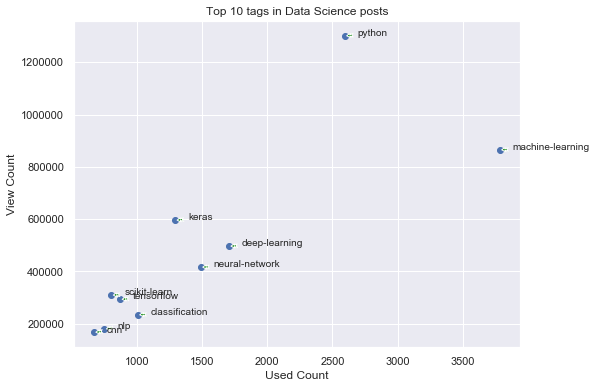

In [10]:
# above graph implemented using matplotlib

x = top_20_tags[:10]['Count']
y= top_20_tags[:10]['ViewCount']
names = top_20_tags[:10].index.values

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x,y)

for i, txt in enumerate(names):
    ax.annotate(txt,(x[i],y[i]),xytext=(x[i]+100,y[i]+10),
               arrowprops = dict(facecolor='green',arrowstyle='fancy'))
plt.title('Top 10 tags in Data Science posts')
plt.xlabel('Used Count')
plt.ylabel('View Count')
plt.show()

From above figure, we can see `python` is at the top considering number of view count. While `machine-learning` tag is at the top considering number of used count. This gives us an idea of more questions were asked using `machine learning` tag while more questions were viewed related to `python` tag.

In [97]:
# scatter plotting using plotly
tags_index = bottom_20_tags.index.values

fig = px.scatter(bottom_20_tags, x="Count", y="ViewCount", text=tags_index, log_x=True, size_max=100)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Bottom 20 tags used in Data Science posts', title_x=0.5)
fig.show()

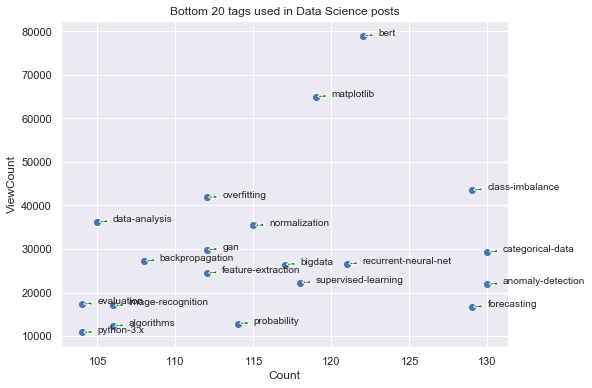

In [133]:
# above graph implemented using matplotlib

x = bottom_20_tags['Count']
y= bottom_20_tags['ViewCount']
names = bottom_20_tags.index.values

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x,y)

for i, txt in enumerate(names):
    ax.annotate(txt,(x[i],y[i]),xytext=(x[i]+1,y[i]-1),
               arrowprops = dict(facecolor='green',arrowstyle='fancy'))
plt.title('Bottom 20 tags used in Data Science posts')
plt.xlabel('Count')
plt.ylabel('ViewCount')
plt.show()

You can notice different machine learning terminology like `overfitting`, `class-imbalance`, `backpropagation` and so on find place in filtered bottom 20 tags. Tag `bert`(technique for Natural language processing) is at top related to view count whereas tags `categorical-data` and `anomaly-detection` placed top related to used count.

###### Top 20 most used and most viewed Tags

Let's analyze the tags most used(for asking questions) and most viewed(people looked for) tags separately.

So, to get the top 20 for both of the tags we've to:
- format dataFrame's into descending order
- use head to take first 20


In [7]:
# top 20 most used tags 
top_20_used_tags = most_used_df.sort_values(by=['Count'],
                                            ascending=False).head(20)

# top 20 most viewed tags
top_20_viewed_tags = most_viewed_df.sort_values(by=['ViewCount'],
                                            ascending=False).head(20)

###### Visualization for the top 20 tags
Here, we're using line graph to show the top 20 tags in both used and viewed tags. After that, we're using the pie-chart to see what portion each tags correspond with respect to total. We're using [plotly](https://plotly.com/) library here.


In [48]:
import plotly.express as px

labels = top_20_used_tags.index.values

fig = px.bar(top_20_used_tags, x=labels,
             y="Count",
             title="Top 20 tags used in Data Science",
            color=labels)
fig.update_layout(showlegend=False)
fig.show()

`Machine Learning` is at the top, 3785 times people have tagged it on the posts. Following its footsteps we can see `python`, 2594 times tagged in the post. We can see people have used `r` 398 times on their posts, bottom forth among the top 20 tags.

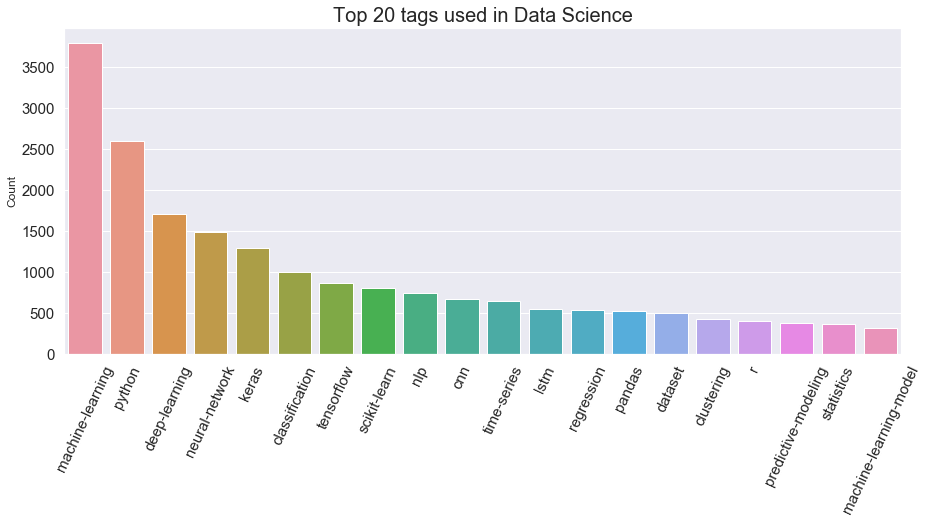

In [43]:
# line graph using seaborn as github doesn't display plotly graphs
labels = top_20_used_tags.index.values

fig,ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=labels,y='Count',data=top_20_used_tags)
plt.xticks(rotation=65,fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 20 tags used in Data Science",fontsize=20)
plt.show()

In [49]:
labels = top_20_viewed_tags.index.values

fig = px.bar(top_20_viewed_tags, x=labels,
             y="ViewCount",
             title="Top 20 tags viewed in Data Science",
            color=labels)
fig.update_layout(showlegend=False)
fig.show()

In the case of view count, post with `python` tag has the viewer of 1.3M. While `r` tag has viewer of 88.9K (thousand) times residing in the top and bottom of the top 20 list.

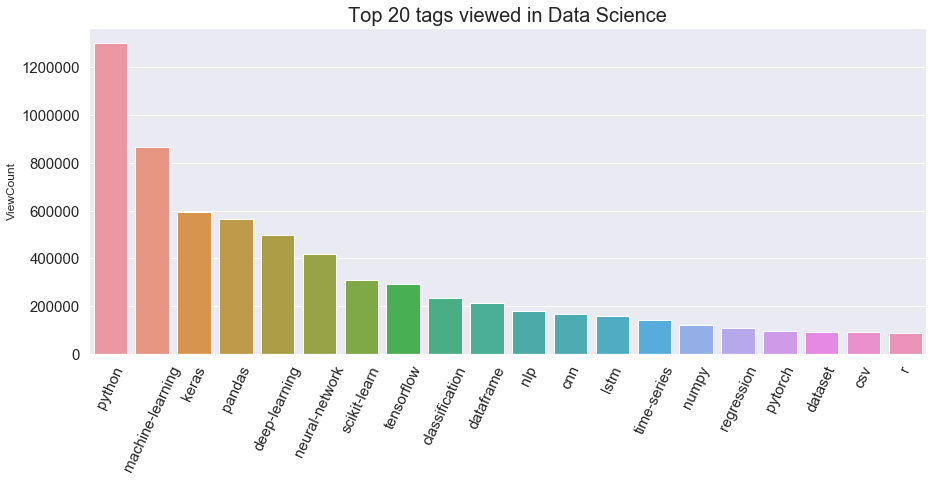

In [44]:
# line graph using seaborn as github doesn't display plotly graphs
labels = top_20_viewed_tags.index.values

fig,ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=labels,y='ViewCount',data=top_20_viewed_tags)
plt.xticks(rotation=65,fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 20 tags viewed in Data Science",fontsize=20)
plt.show()

In [44]:
import plotly.graph_objects as go

labels = top_20_used_tags.index.values
values = top_20_used_tags['Count']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, 
                             textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_layout(showlegend=False,title='Top 20 used Data Science Tags')
fig.show()

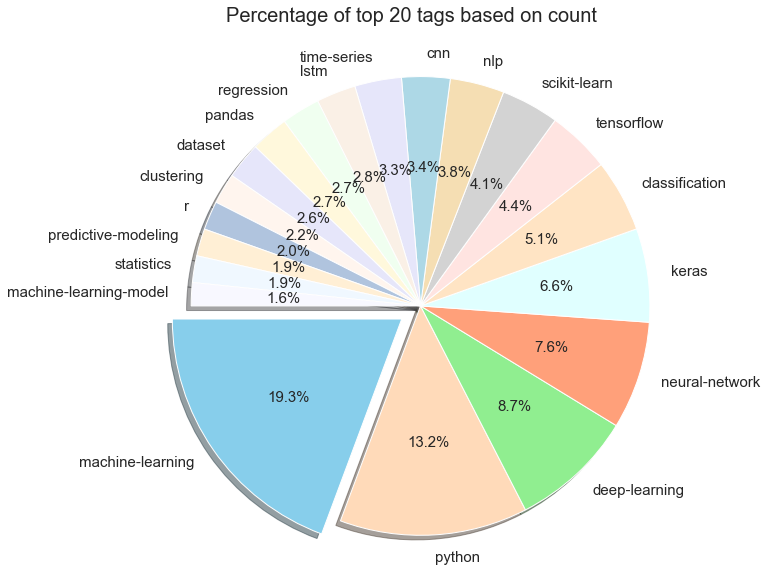

In [56]:
# same for the pie-charts

#Pie chart
labels = top_20_used_tags.index.values
sizes = top_20_used_tags['Count']

# only "explode" the first slice (i.e. value with highest count)
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

# using custom color
colors  = ['skyblue','peachpuff','lightgreen','lightsalmon','lightcyan',
         'bisque','mistyrose','lightgray','wheat','lightblue',
         'lavender','linen','honeydew','cornsilk','lavender',
         'seashell','lightsteelblue','papayawhip','aliceblue','ghostwhite']

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes,explode=explode,labels=labels,
       autopct='%1.1f%%', colors=colors,
      shadow=True,startangle=180, textprops={'fontsize':15})

# Equal aspect ratio ensures that pie is drawn as a circle 
ax.axis('equal')
# setting title fontsize and padding between title and figure
plt.title('Percentage of top 20 tags based on count',
          fontsize=20,y=1.05)
plt.tight_layout()
plt.show()

From above pie-chart we can see that 19.3% of total which is 3785 times machine-learning tag was used in the question from 2019 to 2020(until now). People used this tag to ask question related to machine learning in the StackExchange Data Science platform.

In [45]:
labels = top_20_viewed_tags.index.values
values = top_20_viewed_tags['ViewCount']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, 
                             textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_layout(showlegend=False,title='Top 20 viewed Data Science Tags')
fig.show()

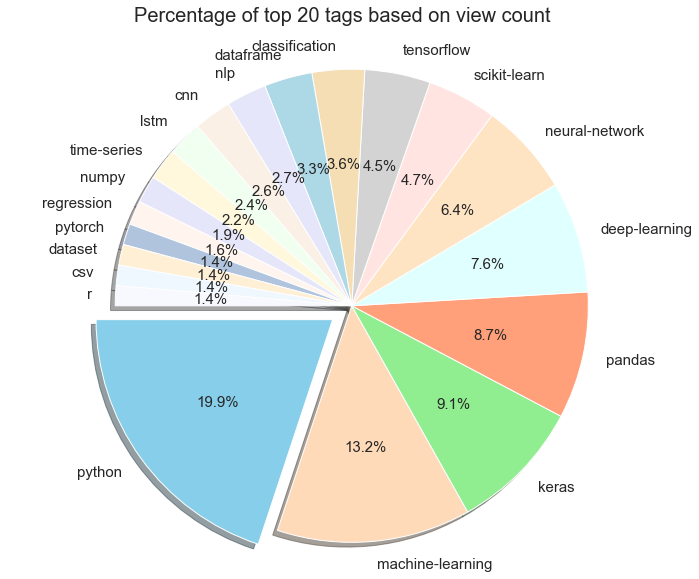

In [61]:
# same for the pie-charts

#Pie chart
labels = top_20_viewed_tags.index.values
sizes = top_20_viewed_tags['ViewCount']

# only "explode" the first slice (i.e. value with highest count)
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

# using custom color
colors  = ['skyblue','peachpuff','lightgreen','lightsalmon','lightcyan',
         'bisque','mistyrose','lightgray','wheat','lightblue',
         'lavender','linen','honeydew','cornsilk','lavender',
         'seashell','lightsteelblue','papayawhip','aliceblue','ghostwhite']

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes,explode=explode,labels=labels,
       autopct='%1.1f%%', colors=colors,
      shadow=True,startangle=180, textprops={'fontsize':15})

# Equal aspect ratio ensures that pie is drawn as a circle 
ax.axis('equal')
# setting title fontsize and padding between title and figure
plt.title('Percentage of top 20 tags based on view count',
          fontsize=20,y=1.05)
plt.tight_layout()
plt.show()

Similarly, above pie-chart shows that 19.9% of total in which python was tagged in the question had more than 1M viewers(not sure if StackExchange uses clicks as the viewCount(don't thing this is true) or uses user IP(Internet Protocol) address as the count but there are some assumptions [here](https://meta.stackexchange.com/questions/36728/how-are-the-number-of-views-in-a-question-calculated)). These are the things you need to consider before setting proxy as actual parameter to determine our conclusion. For now, we considering what data has shown using proxy.

###### Trends over the period in the Tags
In this section, we'll see trends in the tags used in 2019 and 2020 by ploting the line graph for that tag.

In [36]:
import matplotlib.dates as mdates
import re


# function to return dataframe
def tag_df(df,tag_pattern):
    """
    Function to return filter dataFrame containing the specific tag
    
    Args:
        df: main dataFrame
        tag:pattern to filter the dataFrame
        
    Returns:
        Filtered DataFrame
    """
    
    filter_df = df[df['Tags'].apply(lambda tag:
                    True if re.search(tag_pattern,tag) else False)]

    return filter_df


# function to return df containing max and min value of numerical
# features
def max_min_df(df,tag_pattern,feature):
    """
    Function that returns df containing max and min value of
    numerical variables for given dataFrame and features
    
    Args:
        df: dataFrame
        tag_pattern: pattern to match for the exact tag
        feature: column in the dataFrame to filter the dataFrame
        
    Returns:
        dataFrame containing max and min values for given feature
    """
    
    # first filter the dataFrame based on the tag
    filter_df = tag_df(df,tag_pattern)
    
    # using boolean masking for filtering max and min values
    boolean_mask = (filter_df[feature] ==filter_df[feature].max()) | \
                    (filter_df[feature] ==filter_df[feature].min())
    
    return filter_df[boolean_mask]

# let's create a function which takes dataFrame and tag and returns line 
# graph with Date and ViewCount for that tag
def line_graph_tag(df,pattern,feature,interval=8):
    """
    Function plots a line graph for a given tag
    
    Args:
        df: dataFrame
        tag: target tag name to plot the graph
        feature: numerical feature you want to plot against date
        interval: interval for date, you want the data to be considered
        
    Returns:
        displays a line graph
    """
    
    # checking if the feature is numerical 
    if pd.api.types.is_numeric_dtype(df[feature][:1]):
        #print('printing graph')
        #print(type(pattern))
        
        t_df = tag_df(df,pattern)
        
        # setting the date as index
        t_df.set_index('CreationDate',inplace=True)
        
        #plot 
        fig, ax = plt.subplots(figsize=(15,7))
        t_df[feature].plot(ax=ax,color='cornflowerblue')
        
        # set ticks according to interval
        ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO,
                                                        interval=interval))
        
        # set major ticks format
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
        
        tag = '{} tag questions trends'.format(pattern[2:-2])
        
        # set color
        ax.set_facecolor('whitesmoke')
        plt.title(tag,fontsize=25)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.ylabel(feature,fontsize=15)
        
    else:
        print('function supports only numerical variabels')

In [57]:
# value counts for PostTypeId
df['PostTypeId'].value_counts()

1    12755
2    12046
5       94
4       94
6        8
Name: PostTypeId, dtype: int64

When you run following sql command in StackExchange public [database](https://data.stackexchange.com/datascience/query/edit/1264184), we can see there are eight types of Posts and PostId equals `1` represents `Question`. As, we looking for most popular questions asked related to Data Science.

`SELECT *
FROM PostTypes;`

In [10]:
# let's filter the data with post id=1
questions_df = df[df['PostTypeId'] == 1]
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12755 entries, 1 to 24995
Data columns (total 8 columns):
Id               12755 non-null int64
PostTypeId       12755 non-null int64
CreationDate     12755 non-null datetime64[ns]
Score            12755 non-null int64
ViewCount        12755 non-null int32
Tags             12755 non-null object
AnswerCount      12755 non-null int32
FavoriteCount    12755 non-null int32
dtypes: datetime64[ns](1), int32(3), int64(3), object(1)
memory usage: 747.4+ KB


Let's look at the deep-learning tag for now and see the its trend.

In [56]:
# # dataFrame containing deep Learning tag
# deep_learning_tag = questions_df[questions_df["Tags"].apply(
#     lambda tags: True if re.search(r'\bdeep-learning\b', tags) else False)
# ]

In [35]:
# trying with categorical value, which returns msg telling it only 
# supports numerical values
feature = 'Tags'
pattern = r'\bdeep-learning\b'

line_graph_tag(df_clean,pattern,feature)

function supports only numerical variabels


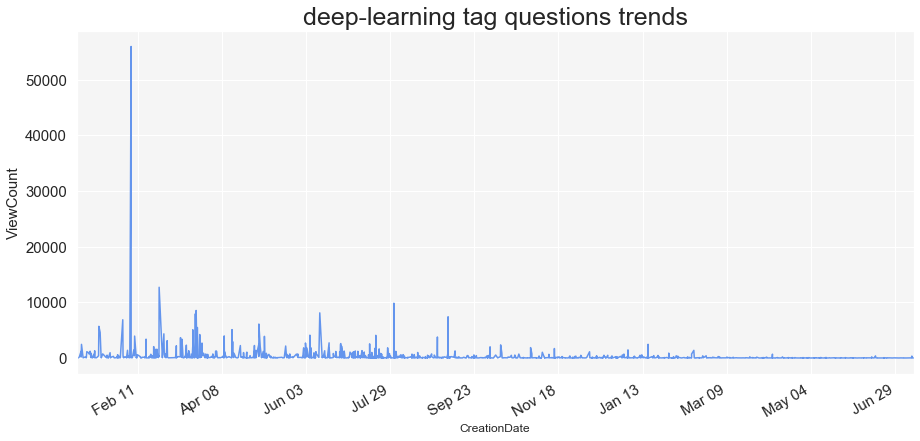

In [17]:
feature = 'ViewCount'
pattern = r'\bdeep-learning\b'

line_graph_tag(questions_df,pattern,feature)

Let's explore the trends of deep-learning tag in recent two months

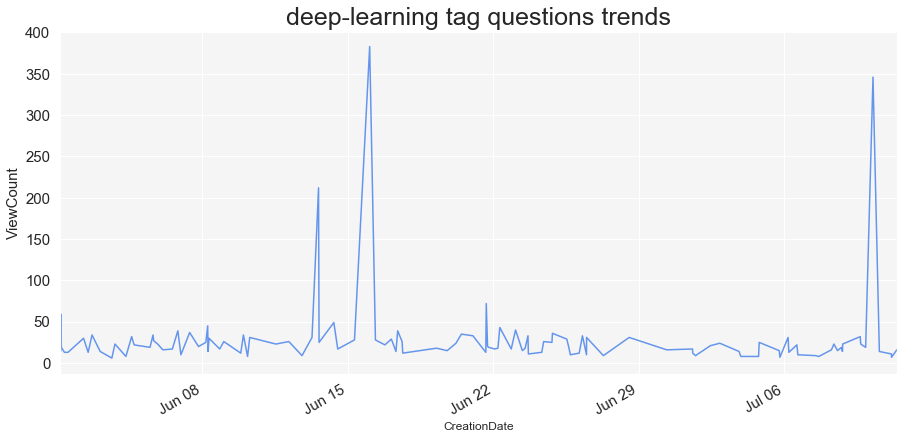

In [13]:
import datetime as dt

feature = 'ViewCount'
pattern = r'\bdeep-learning\b'

# comparing the trends of question asked in deep-learning in recent two months
# i.e from june onwards
dl_2020_2m = questions_df[questions_df['CreationDate'] \
                            > dt.datetime(2020,6,1)]

# plot the graph with the help of the function
line_graph_tag(dl_2020_2m,pattern,feature,interval=1)

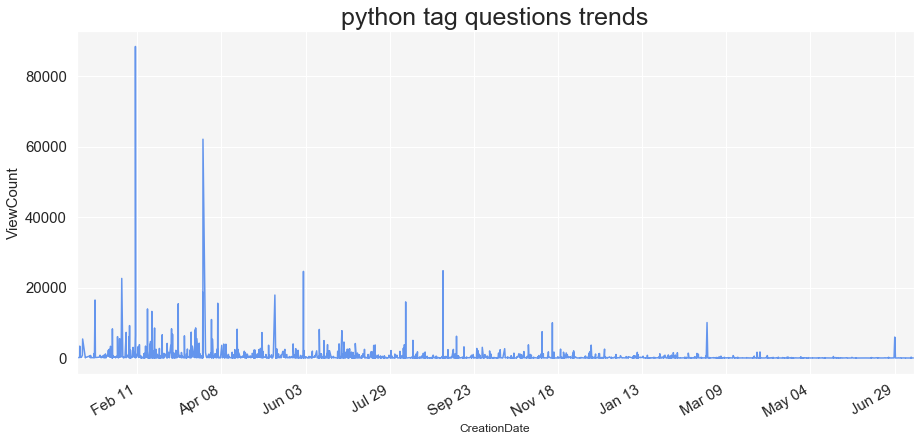

In [11]:
feature = 'ViewCount'
pattern = r'\bpython\b'

line_graph_tag(questions_df,pattern,feature)

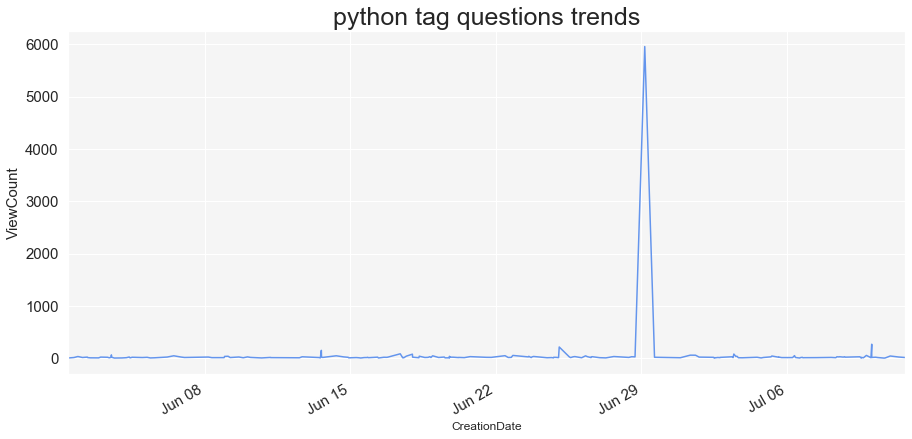

In [30]:
# feature and pattern that you like to search for
feature = 'ViewCount'
pattern = r'\bpython\b'

# comparing the trends of question asked in python in recent two months
# i.e from june onwards
p_2020_2m = questions_df[questions_df['CreationDate'] \
                            > dt.datetime(2020,6,1)]

# plot the graph with the help of the function
line_graph_tag(p_2020_2m,pattern,feature,interval=1)

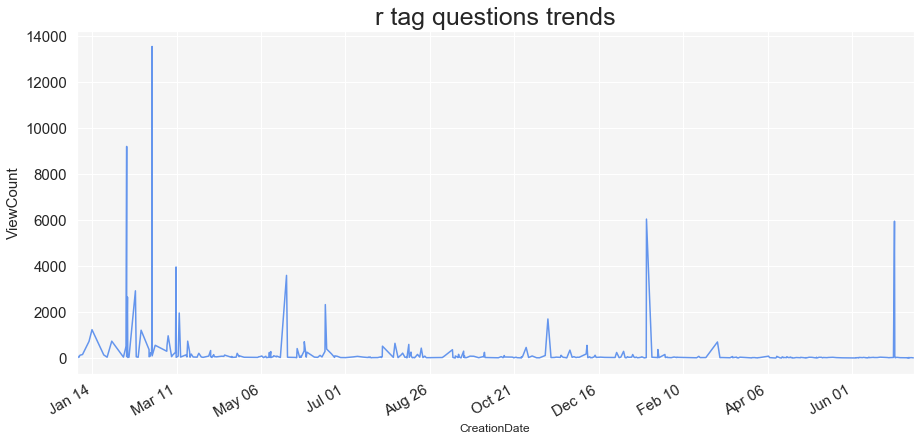

In [39]:
feature = 'ViewCount'
pattern = r'\br\b'

line_graph_tag(questions_df,pattern,feature)

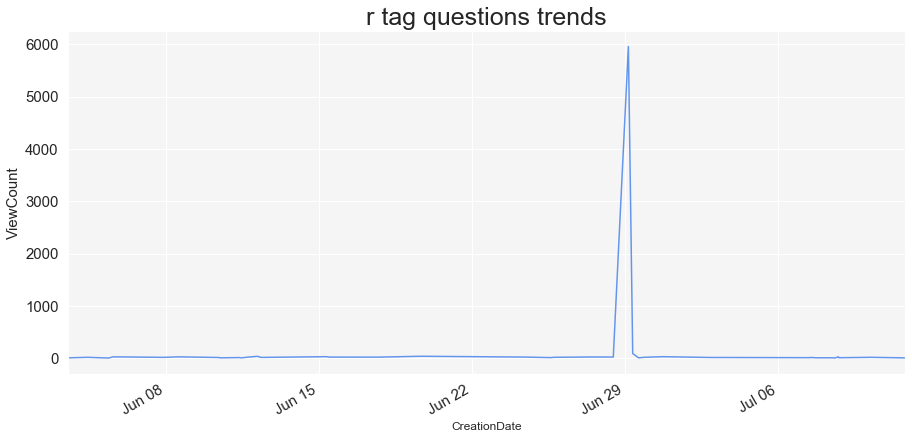

In [40]:
# feature and pattern that you like to search for
feature = 'ViewCount'
pattern = r'\br\b'

# comparing the trends of question asked in R in recent two months
# i.e from june onwards
r_2020_2m = questions_df[questions_df['CreationDate'] \
                            > dt.datetime(2020,6,1)]

# plot the graph with the help of the function
line_graph_tag(r_2020_2m,pattern,feature,interval=1)

Let's find out the highest & lowest view count of the tags with respective month. For now, let's take `python` and `r` tag so that we can perform analysis regarding their popularity.

In [37]:
tag_pattern = r'\bpython\b'

# looking for max and min view count of tag python
max_min_df(questions_df,tag_pattern,'ViewCount')

Id  PostTypeId        CreationDate  Score  ViewCount  \
4653   56469           1 2019-07-27 00:27:57      0          4   
13026  74751           1 2020-05-24 14:01:09      0          4   
14785  45314           1 2019-02-09 18:24:50      6      88393   

                                                    Tags  AnswerCount  \
4653    python,deep-learning,tensorflow,object-detection            0   
13026  python,time-series,vector-space-models,statsmo...            0   
14785                                      python,pandas            3   

       FavoriteCount  
4653               0  
13026              0  
14785              3

We can see from above that there is one Highest view count of python tag is 88393 in Feb,2019 whereas there are two lowest view count with 4 times in May,2019 & July 2019.

Now, What about the score features. Let's have a look.

In [38]:
#using the same tag_pattern as above cell and Score instead of ViewCount
max_min_df(questions_df,tag_pattern,'Score')

Id  PostTypeId        CreationDate  Score  ViewCount  \
2399   60890           1 2019-09-27 13:52:34     -2         33   
9923   73977           1 2020-05-11 15:52:13     -2         24   
12921  57721           1 2019-08-17 12:31:32     -2         32   
16888  58594           1 2019-09-03 09:48:16     -2         56   
20639  60067           1 2019-09-11 19:36:52     -2         38   
22902  76482           1 2020-06-22 17:55:40     -2         19   
24563  76824           1 2020-06-29 03:59:04     24       5955   
24995  69683           1 2020-03-14 12:27:09     -2         27   

                                                    Tags  AnswerCount  \
2399                     python,visualization,matplotlib            1   
9923   machine-learning,python,scikit-learn,regressio...            1   
12921      machine-learning,python,data-cleaning,outlier            1   
16888                    machine-learning,python,dataset            1   
20639                                      python,pandas            1   
22902                   python,data,training,forecasting            1   
24563                  python,r,statistics,data-analysis            7   
24995        machine-learning,python,logistic-regression            1   

       FavoriteCount  
2399               1  
9923               1  
12921              0  
16888              0  
20639              0  
22902              0  
24563              7  
24995              0

Interesting, didn't expected Score value to be in negative. What I found out [here](https://meta.stackoverflow.com/questions/280818/how-are-tag-scores-calculated) after googling: negative values are due to down votes on the post, makes sense. That fulfills my curiosity. 

Let's move on to `r` tag.

In [41]:
tag_pattern = r'\br\b'

# looking for max and min view count of tag python
max_min_df(questions_df,tag_pattern,'ViewCount')

Id  PostTypeId        CreationDate  Score  ViewCount  \
17548  46050           1 2019-02-22 17:32:52      5      13556   
20637  60064           1 2019-09-11 19:16:35      0          4   

                                       Tags  AnswerCount  FavoriteCount  
17548  r,time-series,forecast,data-analysis            4              4  
20637                                     r            0              0

The highest view count was 13556 on Feb 2019 and the lowest count was 4 on Aug 2019.

In [42]:
#using the same tag_pattern as above cell and Score instead of ViewCount
max_min_df(questions_df,tag_pattern,'Score')

Id  PostTypeId        CreationDate  Score  ViewCount  \
219    52511           1 2019-05-24 06:46:23     -1         36   
2064   68437           1 2020-02-21 05:32:59     -1         23   
6878   53843           1 2019-06-15 10:05:22     -1         51   
7515   47757           1 2019-03-21 19:47:10     -1         52   
9707   57424           1 2019-08-12 07:33:28     -1         35   
10578  54452           1 2019-06-25 11:51:11     -1         81   
12925  57725           1 2019-08-17 18:31:00     -1        162   
13488  55166           1 2019-07-06 03:31:01     -1         53   
18713  66949           1 2020-01-23 20:23:44     -1         26   
21683  72433           1 2020-04-16 12:54:30     -1         16   
23307  52170           1 2019-05-18 19:27:20     -1         29   
24563  76824           1 2020-06-29 03:59:04     24       5955   

                                                    Tags  AnswerCount  \
219                                                    r            1   
2064                machine-learning,r,linear-regression            1   
6878                                        r,regression            1   
7515            r,data-mining,dataset,data,data-cleaning            2   
9707           machine-learning,r,machine-learning-model            1   
10578                                      r,programming            2   
12925  python,r,data-science-model,data-analysis,mark...            1   
13488                                                  r            1   
18713                                 machine-learning,r            1   
21683                            r,visualization,rstudio            1   
23307                         machine-learning,r,rstudio            2   
24563                  python,r,statistics,data-analysis            7   

       FavoriteCount  
219                0  
2064               0  
6878               1  
7515               0  
9707               0  
10578              1  
12925              0  
13488              0  
18713              0  
21683              0  
23307              0  
24563              7

Minimium score of -1(down votes) for 11 post and maximun score of 24(upvotes) can be seen in the above table. 

##### Common and Uncommon tags between both top 20 tags
Let's check what is common and what is uncommon in between most used and most viewed tags. For this purpose, we'll be using pandas merge function.

In [38]:
in_used = pd.merge(top_20_used_tags,top_20_viewed_tags,how='left',
                  left_index=True,right_index=True)
in_used

Count  ViewCount
machine-learning         3785   865175.0
python                   2594  1300942.0
deep-learning            1705   496582.0
neural-network           1488   416241.0
keras                    1291   595612.0
classification           1004   233819.0
tensorflow                869   293228.0
scikit-learn              801   309171.0
nlp                       748   179552.0
cnn                       667   166664.0
time-series               646   142171.0
lstm                      544   157203.0
regression                532   107170.0
pandas                    525   566170.0
dataset                   505    92937.0
clustering                422        NaN
r                         398    88902.0
predictive-modeling       377        NaN
statistics                368        NaN
machine-learning-model    320        NaN

In [39]:
in_view = pd.merge(top_20_used_tags,top_20_viewed_tags,how='right',
                  left_index=True,right_index=True)
in_view

Count  ViewCount
python            2594.0    1300942
machine-learning  3785.0     865175
keras             1291.0     595612
pandas             525.0     566170
deep-learning     1705.0     496582
neural-network    1488.0     416241
scikit-learn       801.0     309171
tensorflow         869.0     293228
classification    1004.0     233819
dataframe            NaN     214866
nlp                748.0     179552
cnn                667.0     166664
lstm               544.0     157203
time-series        646.0     142171
numpy                NaN     122505
regression         532.0     107170
pytorch              NaN      94009
dataset            505.0      92937
csv                  NaN      90857
r                  398.0      88902

Above, NaN(Not a Number) after merge shows tags not included in top 20 in both the cases.

Tags present in `top_20_used_tags` and not present in `top_20_viewed_tags` are:
- clustering
- predictive-modeling
- statistics
- machine-learning-model

And in other way around, tags not present are:
- dataframe
- numpy
- pytorch
- csv

So, there were couple of tags which were more used and some were viewed more.

##### Conclusion:
In this project, we analyzed the data from StackExchange Data Science public database to find the popular tags in Data Science. If you're familiar with the data science realm, you can see that quarter of the tags used are from Deep Learning or AI. Python libraries like Pandas, NumPy, and Scikit-learn are in the top 20 tags used.  This gives an idea of Python as a majority's choice to solve data science problems.

We can see the fluctuation in the tags trends over the period of 2019 and 2020(till July 12) from the line graphs above. But if you consider the month to month comparison, the year 2020 has a lower number of counts in the tags used than 2019.

**Relationship between multiple tags**

We can see that there are multiple tags for a single question, so is there any relationship between tags. That's a topic for discussion which we're hoping to address in later sections. For now, just get an idea of mutual tags available.

In [41]:
import re

# looking for multiple tags pair: 'r' and 'pandas'
temp_df[temp_df["Tags"].apply(
    lambda tags: True if re.search(r'\br\b', tags) # regex to look for 'r'
    and "pandas" in tags else False)
]

Id  PostTypeId         CreationDate  Score  ViewCount  \
8562   49148           1  2019-04-11 19:41:39      1        133   
10528  60074           1  2019-09-11 20:35:17      0         94   

                                        Tags  AnswerCount  FavoriteCount  
8562   r,data-mining,pandas,matlab,databases            3              0  
10528                         r,pandas,dplyr            0              0

Questions to look for inorder to get idea about the tags relationship

- Is there any pair of tags(considering tag pair if it appears in more than 10(threshold, you can define whatever you like),considering it doesn't appear coincidently)?
- Is there any relationship between multiple tags( you can consider a mutual tag between two tags)?

For future purpose, we can consider association rules or clustering techniques to find out group of tags that come together. Similar to Market Basket Analysis done in retail industry(what items customer buy together: bread & butter).

Follow up with:
- Apply association rules(mining) to determine tags that come together
- Apply clustering to see different groups of the tags

###### Let's try Association mining for this time.

Let's start preparing data for association mining.

###### Apriori Algorithm

Note: `apyori` library only supports python version between 3.3-3.5, so we're using `efficient_apriori` library as it supports python 3.6 and above.

In [33]:
from efficient_apriori import apriori

###### Data processing
In order to feed the data to the algorithm, we've to convert dataFrame into list of lists or list of tuples. We're lucky, as we've Tags values in the form of string seperated by comma. So, using string split method will produce list. After that, just append the resulting list to list, that gives us our list of lists.

In [34]:
print('Total number of data points = {}'.format(len(df_clean)))

Total number of data points = 24997


In [35]:
# our final list of lists
tag_records = []

for i in range(0,24997):
    # pass for nan
    if type(df_clean.loc[i,'Tags']) != float:
        tag_records.append(df_clean.loc[i,'Tags'].split(','))

In [36]:
# our list of lists
tag_records[:10]

[['lstm', 'loss-function', 'epochs'],
 ['deep-learning', 'cnn'],
 ['time-series', 'clustering', 'unsupervised-learning', 'anomaly-detection'],
 ['machine-learning', 'python', 'dataset', 'training', 'object-detection'],
 ['lstm', 'code'],
 ['lstm'],
 ['reinforcement-learning'],
 ['classification', 'regression', 'feature-extraction', 'feature-engineering'],
 ['pytorch'],
 ['scikit-learn', 'decision-trees']]

Now, let's feed the data to the apriori algorithm to analyze the results.
Before that, let's get idea of the major components of apriori algorithms:

- `Support`: ratio of number times of the item appears in the total transaction.
- `Confidence`: ratio of items A and B appears together in total number of transaction of item A.
- `Left`: Likelihood of item B appears given item A. 



For example, we're taking min_support=0.002 to make sure there are at least 50 data points containing the tags out of 24997. To make sure 10 out of 50 data points have items together, we set min_confidence=0.2.

In [37]:
itemsets,rules = apriori(tag_records,min_support=0.002,
                        min_confidence=0.2)

In [38]:
print('Total number of rules produce by algorithm is {}'.format(len(rules)))

Total number of rules produce by algorithm is 329


In [40]:
# Print out every rule with 2 items on the left hand side,
# 1 item on the right hand side, sorted by lift
rules_rhs = filter(lambda rule: len(rule.lhs) >= 2 and \
                   len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift,
                  reverse=True)[:31]:
    print(rule)  # Prints the rule and its confidence, support, lift, ...

{dataframe, python} -> {pandas} (conf: 0.833, supp: 0.005, lift: 20.246, conv: 5.753)
{forecasting, machine-learning} -> {time-series} (conf: 0.732, supp: 0.002, lift: 14.447, conv: 3.538)
{keras, rnn} -> {lstm} (conf: 0.591, supp: 0.002, lift: 13.855, conv: 2.340)
{keras, time-series} -> {lstm} (conf: 0.552, supp: 0.003, lift: 12.948, conv: 2.138)
{feature-selection, machine-learning} -> {feature-engineering} (conf: 0.224, supp: 0.002, lift: 12.416, conv: 1.265)
{deep-learning, lstm} -> {rnn} (conf: 0.218, supp: 0.002, lift: 12.344, conv: 1.256)
{feature-engineering, machine-learning} -> {feature-selection} (conf: 0.280, supp: 0.002, lift: 11.353, conv: 1.355)
{deep-learning, rnn} -> {lstm} (conf: 0.482, supp: 0.002, lift: 11.305, conv: 1.849)
{numpy, python} -> {pandas} (conf: 0.343, supp: 0.003, lift: 8.323, conv: 1.459)
{lstm, python} -> {keras} (conf: 0.598, supp: 0.004, lift: 5.904, conv: 2.233)
{deep-learning, image-classification} -> {cnn} (conf: 0.302, supp: 0.002, lift: 5.777

Above, you can see the top 31 association rule sorted by lift value in descending order. Let's take the last one for a quick explanation. Taking the number of data points where both the tags `cnn` & `machine-learning` appeared and dividing by total gives support value=0.005. Confidence=0.414 explains that out of all the data points containing `cnn` & `machine-learning` tag, 41.4% of the data points also contain `neural-network` tag.
Finally, lift=3.549 tells us that when `cnn` & `machine-learning` are used together there is likelihood of 3.549 for `neural-network` to appear with them.

Note: Here, data points used instead of explaining things with transaction (from Market Basket Analysis) cause it's more relevant here. In case, people want to related back to it.

###### Final thoughts:
Techniques like apriori algorithms mostly are used in customer transaction data. It is used to identify the items that are bought together by the customer. Insight gain from these is used later in promotion, placement of the items in the store, and many more.

Here, we used this technique to identify the relationship between multiple tags used in the post at StackExchange forum. Total rules produced by the algorithm are 329 out of 148 different tags used. This shows that there are many-to-many relationships between tags.